In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [7]:
! pip install kaggle 

In [10]:
import kaggle

In [11]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [12]:
api.dataset_download_file('nicholasjhana/energy-consumption-generation-prices-and-weather',
                          file_name='energy_dataset.csv')

False

In [13]:
import zipfile

with zipfile.ZipFile('/Users/winifredwetthasinghe/energy_dataset.csv.zip', 'r') as zipref:
    zipref.extractall('/Users/winifredwetthasinghe')

In [14]:
energy = pd.read_csv('energy_dataset.csv')
energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [15]:
energy.head()#To study columns
#which of the columns are interesting???

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [16]:
energy.info()#To get an understanding of datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [17]:
#Data munging 
energy_column = energy.columns
energy_column

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [18]:
energy_index = energy.index
energy_index

RangeIndex(start=0, stop=35064, step=1)

In [19]:
energy.dtypes.value_counts()

float64    28
object      1
dtype: int64

In [20]:
#Handling missing value
#Checking for missing values 
energy.isnull()
#forecast wind offshore eday ahead missing values NaN. So adding 0 to the column


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [21]:
energy.isna().sum().sum()

70529

In [22]:
#There are 70529 missing values found in this energy dataframe

In [23]:
#Checking the number of null values in each column
energy.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [24]:
#Replacing NaN with 0 
energy=energy.fillna(0)

In [25]:
energy.describe()#To check the ranges, whether it makes sense

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,35064.0,...,35064.000000,35064.0,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.305727,447.829198,0.0,5619.851072,4253.880903,298.158139,0.0,0.0,0.0,0.0,...,269.306126,0.0,5461.674595,1439.066735,0.0,5471.216689,28712.129962,28667.476928,49.874341,57.884023
std,85.796305,354.622834,0.0,2204.946787,1963.465684,52.963429,0.0,0.0,0.0,0.0,...,50.572208,0.0,3215.250084,1677.703355,0.0,3176.312853,4594.100854,4664.083855,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,237.000000,18105.000000,0.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4125.000000,2524.750000,263.000000,0.0,0.0,0.0,0.0,...,240.000000,0.0,2930.750000,69.000000,0.0,2979.000000,24793.750000,24800.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,0.0,...,279.000000,0.0,4847.000000,576.000000,0.0,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6428.000000,5837.000000,330.000000,0.0,0.0,0.0,0.0,...,310.000000,0.0,7397.000000,2636.000000,0.0,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,0.0,...,357.000000,0.0,17436.000000,5836.000000,0.0,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [26]:
energy['generation biomass'].unique() #To check any invalid values exist

array([447., 449., 448., 438., 428., 410., 401., 408., 413., 419., 422.,
       421., 425., 423., 426., 427., 442., 445., 443., 440., 368., 358.,
       353., 354., 357., 359., 377., 376., 373., 383., 391., 395., 394.,
       435., 437., 478., 463., 452., 454., 453., 458., 433., 431., 397.,
       393., 418., 462., 456., 351., 350., 366., 372., 396., 415., 402.,
       411., 403., 407., 400., 409., 436., 424., 363.,   0., 334., 338.,
       341., 343., 345., 369., 374., 370., 375., 371., 362., 535., 532.,
       530., 541., 545., 540., 546., 544., 543., 539., 547., 538., 534.,
       537., 533., 528., 536., 531., 499., 502., 491., 495., 503., 505.,
       506., 510., 501., 494., 498., 497., 483., 482., 481., 479., 516.,
       508., 509., 518., 525., 529., 522., 504., 500., 514., 513., 511.,
       519., 515., 489., 485., 477., 480., 493., 490., 487., 492., 486.,
       470., 468., 476., 553., 559., 564., 561., 566., 563., 554., 560.,
       565., 556., 558., 577., 562., 575., 578., 49

In [27]:
energy.isna().sum().sum()#To check whether there are any null values left

0

In [28]:
energy.isna().sum()#Listing all columns to see whether there are any invalid values exist

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage aggregated     0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offs

In [29]:
energy['time'] #time is in string object type. Needs to be converted to datetime

0        2015-01-01 00:00:00+01:00
1        2015-01-01 01:00:00+01:00
2        2015-01-01 02:00:00+01:00
3        2015-01-01 03:00:00+01:00
4        2015-01-01 04:00:00+01:00
                   ...            
35059    2018-12-31 19:00:00+01:00
35060    2018-12-31 20:00:00+01:00
35061    2018-12-31 21:00:00+01:00
35062    2018-12-31 22:00:00+01:00
35063    2018-12-31 23:00:00+01:00
Name: time, Length: 35064, dtype: object

In [30]:
from datetime import datetime

In [31]:
energy['time'] = pd.to_datetime(energy['time'], utc=True, format='%Y-%m-%d %H:%M:%S%z')
#Using the dateformat to convert

We are happy to proceed with these cleaned data. 

In [32]:
energy.info() #Looking at the info again to check any columns have unusual data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil coal-derived gas           35064 non-null  float64            
 4   generation fossil gas                        35064 non-null  float64            
 5   generation fossil hard coal                  35064 non-null  float64            
 6   generation fossil oil                        35064 non-null  float64            
 7   generation fossil oil shale                  35064 non-null  float64            
 8   generation fossil peat    

* Demand vs Supply over the years?
* Which generation type provided highest contribution for the electricity generation over the years?
* Which generation type could not keep up with energy demand?
* Forecasted price vs actual price

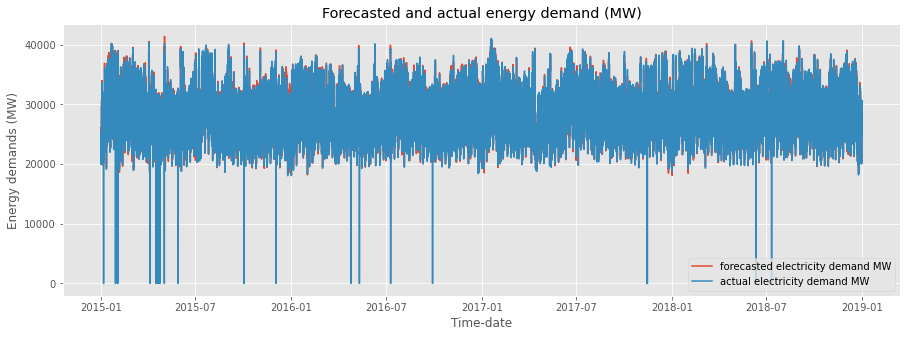

In [33]:
#Forecasted demand vs actual demand
# line 1 points
x1= energy['time']
y1 = energy['total load forecast']

# plotting the line 1 points 
plt.plot(x1, y1, label = "forecasted electricity demand MW")
  
# line 2 points
x2= energy['time']
y2 = energy['total load actual']
# plotting the line 2 points 
plt.plot(x2, y2, label = "actual electricity demand MW")
  
# naming the x axis
plt.xlabel('Time-date')
# naming the y axis
plt.ylabel('Energy demands (MW)')
# giving a title to my graph
plt.title('Forecasted and actual energy demand (MW)')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

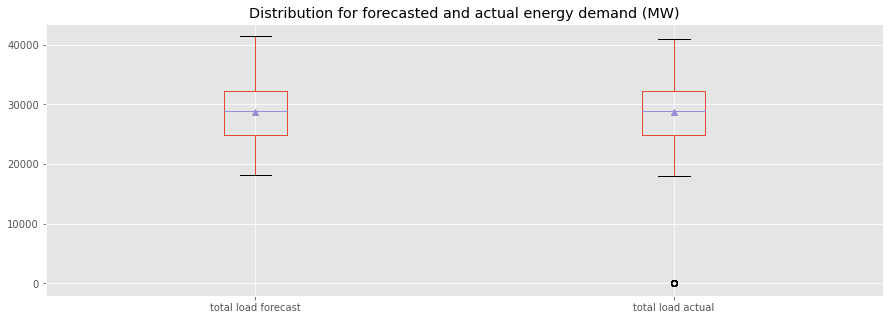

In [34]:
#what is higher?
bx = energy[['total load forecast', 'total load actual']].plot(kind='box', title='Distribution for forecasted and actual energy demand (MW)', showmeans=True)
plt.show()

In [35]:
#What is higher?
energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,35064.0,...,35064.000000,35064.0,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.305727,447.829198,0.0,5619.851072,4253.880903,298.158139,0.0,0.0,0.0,0.0,...,269.306126,0.0,5461.674595,1439.066735,0.0,5471.216689,28712.129962,28667.476928,49.874341,57.884023
std,85.796305,354.622834,0.0,2204.946787,1963.465684,52.963429,0.0,0.0,0.0,0.0,...,50.572208,0.0,3215.250084,1677.703355,0.0,3176.312853,4594.100854,4664.083855,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,237.000000,18105.000000,0.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4125.000000,2524.750000,263.000000,0.0,0.0,0.0,0.0,...,240.000000,0.0,2930.750000,69.000000,0.0,2979.000000,24793.750000,24800.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,0.0,...,279.000000,0.0,4847.000000,576.000000,0.0,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6428.000000,5837.000000,330.000000,0.0,0.0,0.0,0.0,...,310.000000,0.0,7397.000000,2636.000000,0.0,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,0.0,...,357.000000,0.0,17436.000000,5836.000000,0.0,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [36]:
#The difference
energy['total load forecast'].mean()-energy['total load actual'].mean()
#This means the predicted load is 44.70 kW higher than the actual demand. 

44.653034451290296

In [37]:
#Total electricity generated?
#Check all the columns for generation types
energy_column = energy.columns
energy_column

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [38]:
a=sum(energy['generation biomass'])
b=sum(energy['generation fossil brown coal/lignite'])
c=sum(energy['generation fossil coal-derived gas'])
d=sum(energy['generation fossil gas'])
e=sum(energy['generation fossil hard coal'])
f=sum(energy['generation fossil oil'])
g=sum(energy['generation fossil oil shale'])
h=sum(energy['generation fossil peat'])
i=sum(energy['generation geothermal'])
j=sum(energy['generation hydro pumped storage aggregated'])
k=sum(energy['generation hydro pumped storage consumption'])
l=sum(energy['generation hydro run-of-river and poundage'])
m=sum(energy['generation hydro water reservoir'])
n=sum(energy['generation marine'])
o=sum(energy['generation nuclear'])
p=sum(energy['generation other'])
q=sum(energy['generation other renewable'])
r=sum(energy['generation solar'])
s=sum(energy['generation waste'])
t=sum(energy['generation wind offshore'])

Total=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]
Total_supplied=sum(Total)
#The total supplied energy is 812,138,748.0 kW

In [39]:
#Did supply met the real demand?
#Atcual demand vs Supply
Actual_demand=energy['total load actual'].sum()
Energy_abundance=Actual_demand-Total_supplied
Energy_abundance
#Energy of 193,057,663.0 kW was in abundance.

193057663.0

In [40]:
#Which generation type provided highest contribution for the electricity generation over the years?
Total

[13440232.0,
 15702683.0,
 0.0,
 197054458.0,
 149158080.0,
 10454617.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16666608.0,
 34067809.0,
 91298851.0,
 0.0,
 219531150.0,
 2110771.0,
 3001329.0,
 50209210.0,
 9442950.0,
 0.0]

In [42]:
max(Total)
# Maximum value is 219531150.0 kW

219531150.0

* Generation nuclear has provided the highest contribution for electricity generation to meet the demand, second highest is fossil gas
* This meaning non-renewable resources are contributing majorly for the energy generation.

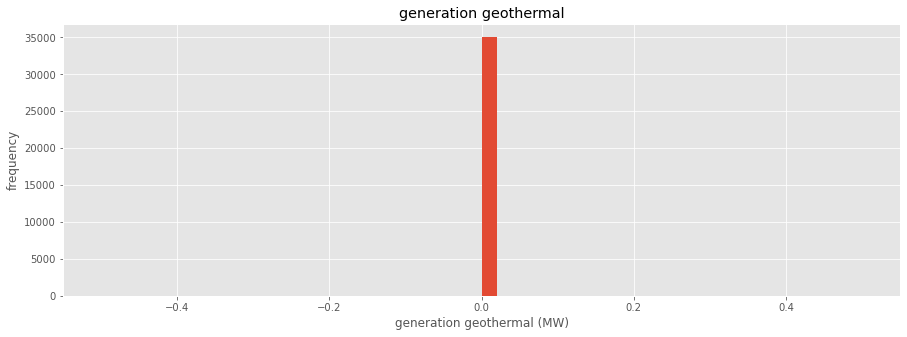

In [48]:
frame = energy.hist('generation geothermal', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("generation geothermal (MW)")
    ax.set_ylabel("frequency")

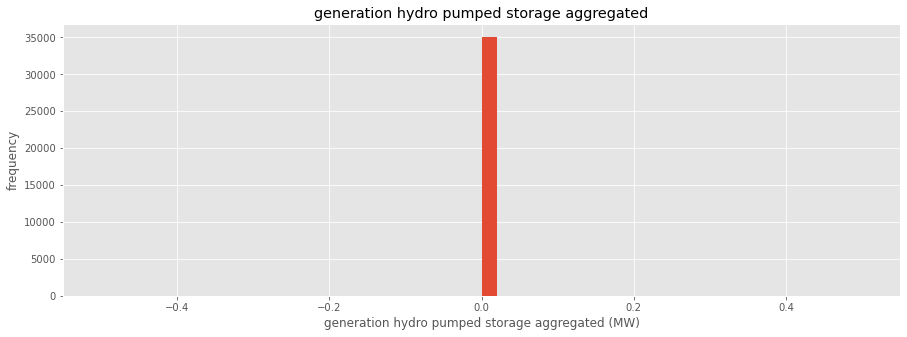

In [45]:

frame = energy.hist('generation hydro pumped storage aggregated', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("generation hydro pumped storage aggregated (MW)")
    ax.set_ylabel("frequency")

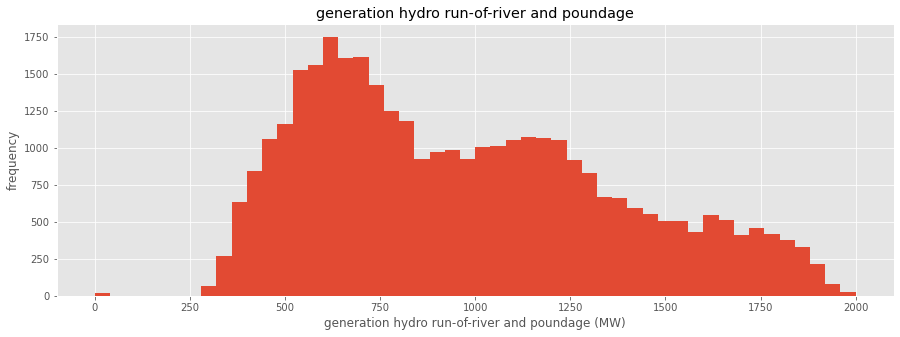

In [49]:
frame = energy.hist('generation hydro run-of-river and poundage', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel('generation hydro run-of-river and poundage (MW)')
    ax.set_ylabel("frequency")

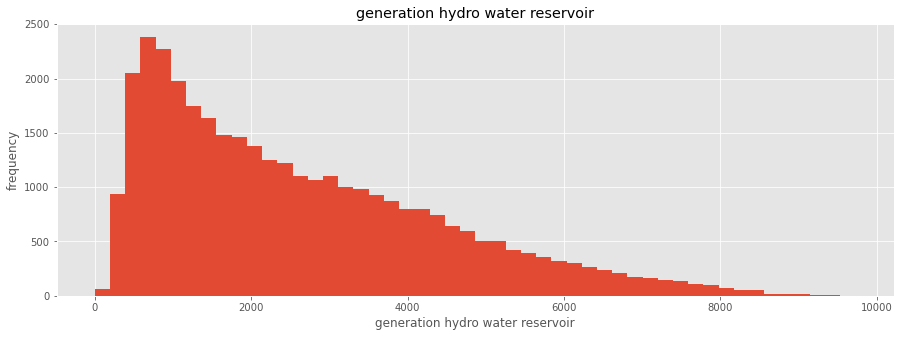

In [50]:
frame = energy.hist('generation hydro water reservoir', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel('generation hydro water reservoir')
    ax.set_ylabel("frequency")
#Rightly skewed

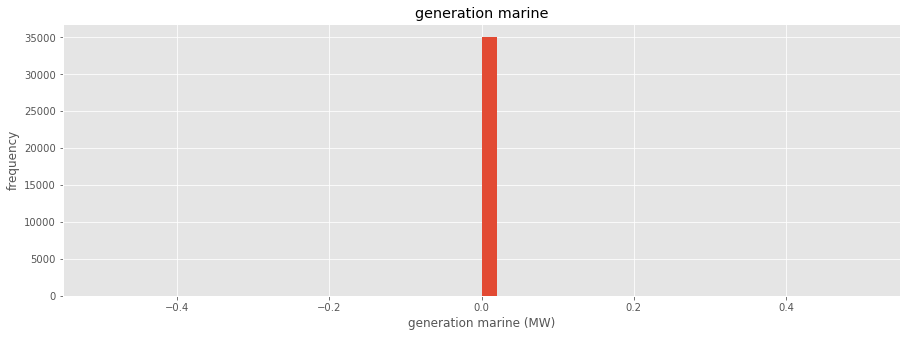

In [223]:
frame = energy.hist('generation marine', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("generation marine (MW)")
    ax.set_ylabel("frequency")

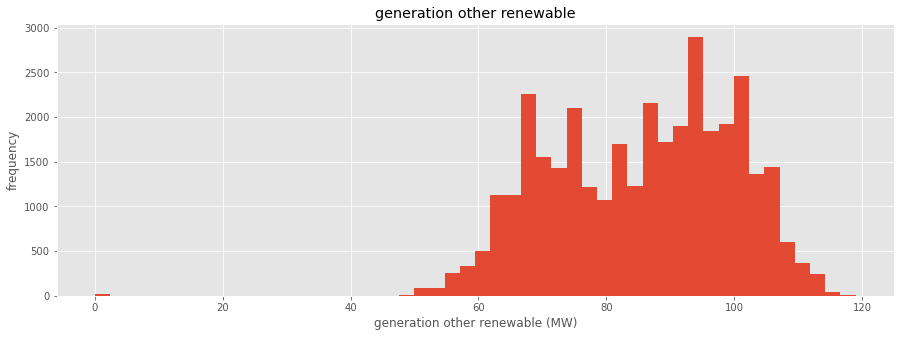

In [222]:
frame = energy.hist('generation other renewable', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("generation other renewable (MW)")
    ax.set_ylabel("frequency")

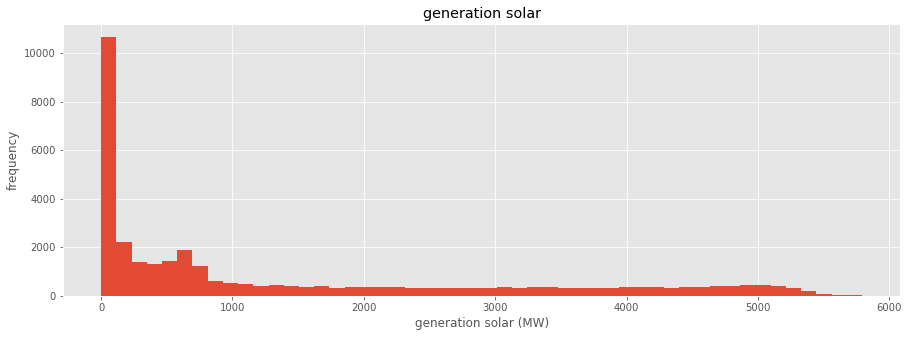

In [220]:
frame = energy.hist('generation solar', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("generation solar (MW)")
    ax.set_ylabel("frequency")

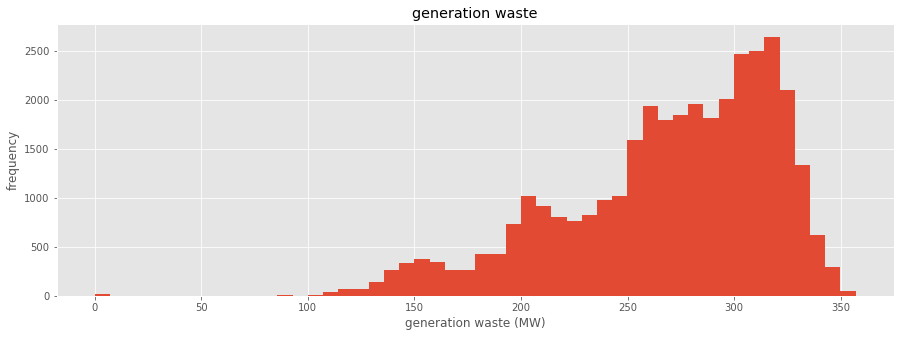

In [218]:
frame = energy.hist('generation waste', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("generation waste (MW)")
    ax.set_ylabel("frequency")


* Which generation type could not keep up with energy demand?
* generation marine, generation geothermal, generation hydro pumped storage aggregated

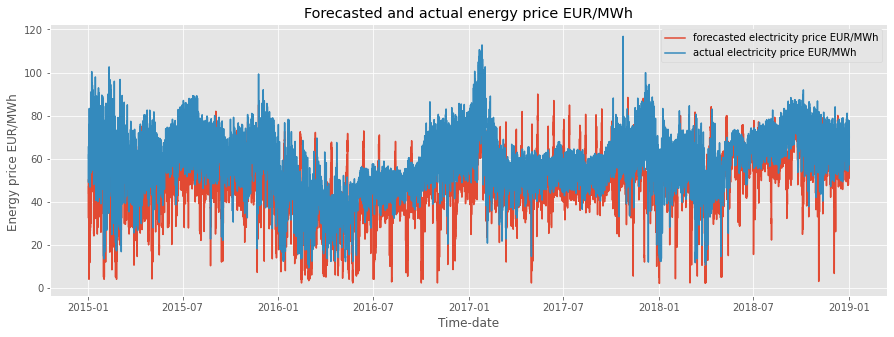

In [200]:
#Forecasted demand vs actual price
# line 1 points
x1= energy['time']
y1 = energy['price day ahead']

# plotting the line 1 points 
plt.plot(x1, y1, label = "forecasted electricity price EUR/MWh")
  
# line 2 points
x2= energy['time']
y2 = energy['price actual']
# plotting the line 2 points 
plt.plot(x2, y2, label = "actual electricity price EUR/MWh")
  
# naming the x axis
plt.xlabel('Time-date')
# naming the y axis
plt.ylabel('Energy price EUR/MWh ')
# giving a title to my graph
plt.title('Forecasted and actual energy price EUR/MWh')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

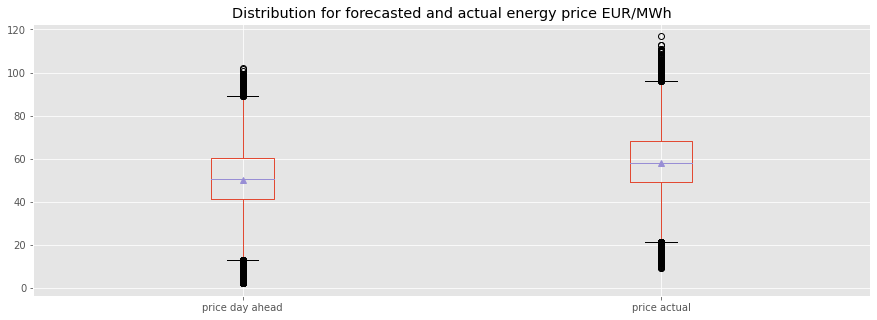

In [201]:
#what is higher?
bx = energy[['price day ahead', 'price actual']].plot(kind='box', title='Distribution for forecasted and actual energy price EUR/MWh', showmeans=True)
plt.show()

* There are more outliers, they are located outside the whiskers of the box plot 
* (1.5 times the interquantile range above the upper quantile and lower quantile) 

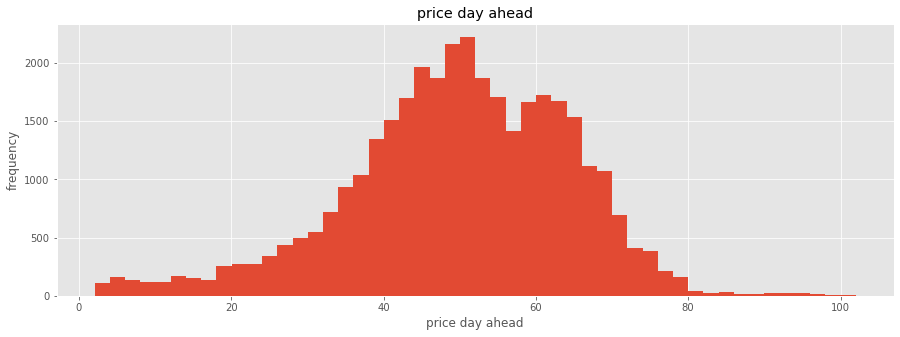

In [204]:
frame = energy.hist('price day ahead', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("price day ahead")
    ax.set_ylabel("frequency")

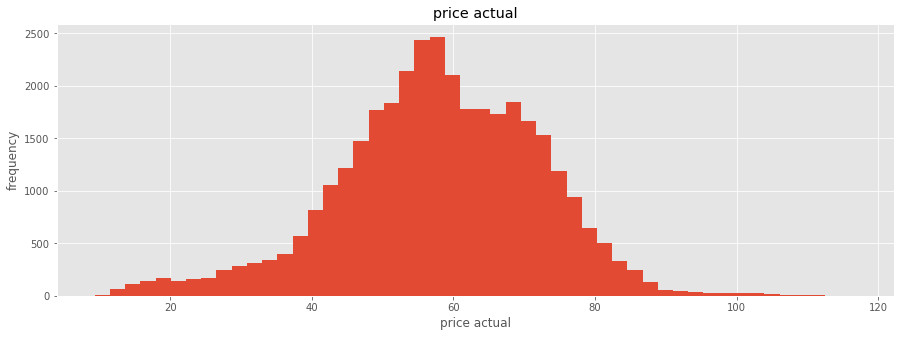

In [205]:
frame = energy.hist('price actual', bins= 50)
for ax in frame.flatten():
    ax.set_xlabel("price actual")
    ax.set_ylabel("frequency")

In [203]:
#The difference
energy['price actual'].mean()-energy['price day ahead'].mean()
#This means the predicted price is 8 EUR/MWh higher than the actual demand. 

8.00968172485014

* Demand vs Supply over the year? The supply could meet the demand over the 4 years. 
* Which generation type provided highest contribution for the electricity generation over the years?Generation nuclear 
* Which generation type could not keep up with energy demand? All renewable generation types
* Forecasted price vs actual price? Actual price is higher than the predicted.